**Topi Modelling dengan Latent Dirichlet Allocation(LDA) dengan Dataset Riview Drama Korea 2015-2023**

---
Kelompok:


*  Alfun Roehatul Jannah(212102003)
*  Ria Kristi (212102013)



**Import Modul**

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
!pip install gensim

In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

**Load Dataset**

link dataset: https://www.kaggle.com/datasets/chanoncharuchinda/korean-drama-2015-23-actor-and-reviewmydramalist

In [ ]:
df = pd.read_csv('reviews.csv')


In [ ]:
df.head()

,user_id,title,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,review_text,ep_watched,n_helpful
0,c8ffdab3f2a338eeb54b265598dbbb55,Sing My Crush,9.0,9.0,10.0,9.0,9.0,the Best Song from my Crush This will now ran...,8 of 8 episodes seen,23.0
1,c8ffdab3f2a338eeb54b265598dbbb55,Happy Merry Ending,5.0,7.0,9.0,4.0,6.5,I'm Happy and Merry That it Ended Quickly The ...,8 of 8 episodes seen,31.0
2,c8ffdab3f2a338eeb54b265598dbbb55,Duty After School: Part 2,4.0,9.0,3.0,1.0,4.0,This PART 2 Should Never Have Happened If you...,4 of 4 episodes seen,121.0
3,c8ffdab3f2a338eeb54b265598dbbb55,Our Dating Sim,9.0,9.5,9.0,9.0,9.0,I want to play this dating sim! I want to pla...,8 of 8 episodes seen,79.0
4,c8ffdab3f2a338eeb54b265598dbbb55,The Director Who Buys Me Dinner,7.5,8.5,7.0,6.0,7.0,"Half-Cooked, Dont Eat A hard pass, unless som...",10 of 10 episodes seen,66.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              4177 non-null   object 
 1   title                4176 non-null   object 
 2   story_score          4176 non-null   float64
 3   acting_cast_score    4176 non-null   float64
 4   music_score          4176 non-null   float64
 5   rewatch_value_score  4176 non-null   float64
 6   overall_score        4176 non-null   float64
 7   review_text          4174 non-null   object 
 8   ep_watched           4176 non-null   object 
 9   n_helpful            4176 non-null   float64
dtypes: float64(6), object(4)
memory usage: 326.5+ KB


drop columns as it is useless

In [ ]:
# drop columns
df.drop(['user_id','story_score','acting_cast_score','music_score','rewatch_value_score','overall_score','ep_watched','n_helpful'],axis=1,inplace=True)

In [ ]:
df.head()

,title,review_text
0,Sing My Crush,the Best Song from my Crush This will now ran...
1,Happy Merry Ending,I'm Happy and Merry That it Ended Quickly The ...
2,Duty After School: Part 2,This PART 2 Should Never Have Happened If you...
3,Our Dating Sim,I want to play this dating sim! I want to pla...
4,The Director Who Buys Me Dinner,"Half-Cooked, Dont Eat A hard pass, unless som..."


**DATA CLEANING & PRE-PROCESSING**

---
used the lemmatizer. Also the stop words have been used along with the words wit lenght shorter than 3 characters to reduce some stray words.


In [ ]:
df.dropna(subset=['review_text'], inplace=True)  # Drop baris dengan nilai null pada kolom review_text
df.reset_index(drop=True, inplace=True)

In [ ]:
def clean_text(review):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(review)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [ ]:
# time taking
df['review_cleaned_text']=df['review_text'].apply(clean_text)

In [ ]:
df.head()

,title,review_text,review_cleaned_text
0,Sing My Crush,the Best Song from my Crush This will now ran...,Best Song Crush This rank favorite drama ever....
1,Happy Merry Ending,I'm Happy and Merry That it Ended Quickly The ...,Happy Merry That Ended Quickly wedding singing...
2,Duty After School: Part 2,This PART 2 Should Never Have Happened If you...,This PART Should Never Have Happened loved fir...
3,Our Dating Sim,I want to play this dating sim! I want to pla...,want play dating want play dating Dating eight...
4,The Director Who Buys Me Dinner,"Half-Cooked, Dont Eat A hard pass, unless som...",Half-Cooked Dont hard pas unless someone buy d...


 Now drop the unpre-processed column. Menghapus kolom review_text yang belum di cleaning

In [ ]:
df.drop(['review_text'],axis=1,inplace=True)

In [ ]:
df.head()

,title,review_cleaned_text
0,Sing My Crush,Best Song Crush This rank favorite drama ever....
1,Happy Merry Ending,Happy Merry That Ended Quickly wedding singing...
2,Duty After School: Part 2,This PART Should Never Have Happened loved fir...
3,Our Dating Sim,want play dating want play dating Dating eight...
4,The Director Who Buys Me Dinner,Half-Cooked Dont hard pas unless someone buy d...


**EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )**

---



In [ ]:
# to play with. min_df,max_df,max_features etc...
vect =TfidfVectorizer(stop_words='english',max_features=1000)

In [ ]:
vect_text=vect.fit_transform(df['review_cleaned_text'])

We can now see the most frequent and rare words in the review based on idf score. The lesser the value; more common is the word in the news headlines.

In [ ]:
print(vect_text.shape)
print(vect_text)

(4174, 1000)
  (0, 621)	0.05482812114639867
  (0, 954)	0.08714318642704393
  (0, 230)	0.1731368030118356
  (0, 355)	0.05510130883981978
  (0, 319)	0.09511732344361257
  (0, 194)	0.08285256749260271
  (0, 887)	0.06805297740012667
  (0, 94)	0.07660140960967285
  (0, 861)	0.10157402923985936
  (0, 6)	0.1090767844776162
  (0, 300)	0.07227581443043095
  (0, 894)	0.09729865891399594
  (0, 361)	0.09719533012141433
  (0, 492)	0.101451777516478
  (0, 125)	0.1070209972320419
  (0, 368)	0.08181937196361129
  (0, 536)	0.07753413171873619
  (0, 853)	0.09530805504519861
  (0, 256)	0.09005279765168753
  (0, 957)	0.09241613745604801
  (0, 30)	0.10257385061247555
  (0, 400)	0.09346235515344886
  (0, 424)	0.11204402646238729
  (0, 873)	0.24597204594106434
  (0, 485)	0.11260568446551032
  :	:
  (4173, 749)	0.09914199417638182
  (4173, 510)	0.1030571149613102
  (4173, 241)	0.06914520010117989
  (4173, 245)	0.18853071377824002
  (4173, 507)	0.08297245931833025
  (4173, 534)	0.10024038544604827
  (4173, 92)

In [ ]:
idf=vect.idf_

menganalisis dan mengevaluasi kata-kata berdasarkan nilai IDF. Dengan mencetak kata-kata dengan nilai IDF terkecil dan terbesar, serta mencetak nilai IDF untuk kata-kata tertentu seperti 'acting' dan 'soundtrack', kita dapat mendapatkan wawasan tentang kata-kata yang paling umum dan paling jarang muncul dalam dataset teks tersebut.

In [ ]:
dd=dict(zip(vect.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(f'nilai IDF terendah (pada indeks 0): {l[0]} \nnilai IDF tertinggi (pada indeks-1): {l[-1]}')
print('acting:', dd['acting'])
print('soundtrack:', dd['soundtrack'])

nilai IDF terendah (pada indeks 0): drama 
nilai IDF tertinggi (pada indeks-1): mouse
acting: 2.0143592032875617
soundtrack: 4.13837260601913



*   Kata dengan nilai IDF terendah (pada indeks 0) adalah 'drama'.
*   Kata dengan nilai IDF tertinggi (pada indeks -1) adalah 'zombie'.

Ini menunjukkan bahwa kata 'drama' adalah kata yang paling umum atau sering muncul dalam dataset teks, sementara kata 'zombie' adalah kata yang lebih jarang muncul dan memiliki kepentingan lebih tinggi.


*  Nilai IDF untuk kata 'acting' adalah 1.9027296168716215.
*   Nilai IDF untuk kata 'soundtrack' adalah 4.100883562304474.

Nilai-nilai IDF menunjukkan seberapa penting atau uniknya suatu kata dalam dataset teks. Semakin tinggi nilai IDF, semakin jarang kata tersebut muncul di seluruh dataset, dan semakin tinggi bobotnya dalam perhitungan TF-IDF.


**TOPIC MODELLING**



Topic Coherence Score-Menemukan jumlah optimal topic

In [ ]:
pip install --upgrade gensim

In [ ]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim import corpora

texts = [text.split() for text in df['review_cleaned_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def calculate_coherence_score(dictionary, corpus, texts, limit):
  coherence_values=[]
  model_list =[]
  for num_topics in range(1, limit):
    lda_model  = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, iterations=100)
    model_list.append(lda_model)
    coherence_model  = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

  # show graph
  x = range(1, limit)
  plt.plot(x, coherence_values)
  plt.xlabel("Number of Topics")
  plt.ylabel("Coherence Score")
  plt.xticks(x)
  plt.legend(("coherence_values"), loc='best')
  plt.show()

  # print coherence values
  for num_topics, coherence_score in zip(range(1, limit), coherence_values):
    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score}")

  return model_list, coherence_values


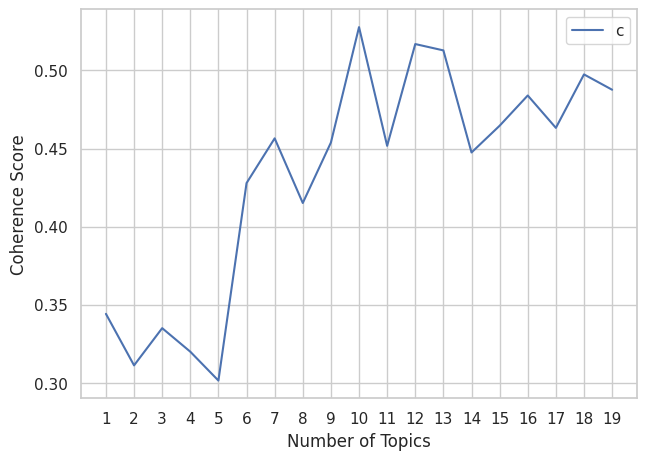

Number of Topics: 1, Coherence Score: 0.344278294517525
Number of Topics: 2, Coherence Score: 0.3113043321868153
Number of Topics: 3, Coherence Score: 0.33512279610165424
Number of Topics: 4, Coherence Score: 0.3200611800109456
Number of Topics: 5, Coherence Score: 0.30158471077579996
Number of Topics: 6, Coherence Score: 0.42793210045904
Number of Topics: 7, Coherence Score: 0.45655760058084477
Number of Topics: 8, Coherence Score: 0.4151949822971759
Number of Topics: 9, Coherence Score: 0.4538657505963223
Number of Topics: 10, Coherence Score: 0.5277201774702263
Number of Topics: 11, Coherence Score: 0.4517668358561361
Number of Topics: 12, Coherence Score: 0.5168900026713531
Number of Topics: 13, Coherence Score: 0.5128294789284997
Number of Topics: 14, Coherence Score: 0.44751588506186973
Number of Topics: 15, Coherence Score: 0.4646322090820206
Number of Topics: 16, Coherence Score: 0.4839809699721198
Number of Topics: 17, Coherence Score: 0.46326992132870637
Number of Topics: 18,

In [ ]:
#evaluate
model_list, coherence_values = calculate_coherence_score(dictionary=dictionary, corpus=corpus, texts=texts, limit=20)


**Latent Dirichlet Allocation (LDA)**


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1)
# n_components is the number of topics

In [ ]:
lda_top=lda_model.fit_transform(vect_text)

In [ ]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(10619, 10)
[[0.91006243 0.00999244 0.00999244 ... 0.0099925  0.00999521 0.00999246]
 [0.88923982 0.01230576 0.01230576 ... 0.01230594 0.01230795 0.01230592]
 [0.90025056 0.01108278 0.01108278 ... 0.01108289 0.01108411 0.0110828 ]
 ...
 [0.91132559 0.0098523  0.0098523  ... 0.00985235 0.00985349 0.00985233]
 [0.88426207 0.01285889 0.01285889 ... 0.01285902 0.01286102 0.01285894]
 [0.89143456 0.01206206 0.01206206 ... 0.0120646  0.0120633  0.01206231]]


In [ ]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)

1.0


Perhatikan bahwa nilai dalam baris tertentu diatas berjumlah 1. Hal ini karena setiap nilai menunjukkan % kontribusi topik terkait dalam dokumen.¶

In [ ]:
# menampilkan komposisi topik
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  91.00624348533213 %
Topic  1 :  0.9992442543745774 %
Topic  2 :  0.9992437387626967 %
Topic  3 :  0.9995164181285596 %
Topic  4 :  0.9992437176420649 %
Topic  5 :  0.9992463231658437 %
Topic  6 :  0.9992436980400106 %
Topic  7 :  0.9992504326773909 %
Topic  8 :  0.9995214848576927 %
Topic  9 :  0.9992464470190423 %


Penjelasan dari kode diatas


Document 0: Ini adalah dokumen pertama dalam dataset.

Topic X : Y%: Ini menunjukkan komposisi topik dalam dokumen tersebut. Setiap baris mewakili satu topik, dan persentase menunjukkan sejauh mana topik tersebut menyusun dokumen.

Topic 0 : 91.00624348533213%: Menunjukkan bahwa sekitar 91% dari dokumen terdiri dari topik 0. Topik ini adalah topik yang paling mendominasi dalam dokumen tersebut.

Topic 1 - Topic 9 : ... : ...%: Topik-topik lain (Topic 1 hingga Topic 9) hanya menyusun sebagian kecil dari dokumen, dengan persentase yang sangat rendah (kurang dari 1%). Ini menunjukkan bahwa topik-topik ini tidak terlalu dominan dalam dokumen dan hanya memberikan kontribusi kecil.

Secara keseluruhan, komposisi topik ini memberikan pemahaman tentang topik atau tema apa yang mendominasi dalam dokumen pertama. Dalam contoh ini, Topic 0 adalah topik utama dalam dokumen tersebut.

In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[1.28933691e+02 2.96520023e+01 8.62316579e+01 ... 3.05857377e+01
  2.39561901e+01 1.34029254e+01]
 [1.01408148e-01 1.07104283e-01 1.02056034e-01 ... 1.01261214e-01
  1.01315474e-01 1.01650337e-01]
 [1.01022325e-01 1.01261583e-01 1.01546681e-01 ... 1.02436506e-01
  1.01628632e-01 1.01229468e-01]
 ...
 [1.06625789e-01 1.04015877e-01 1.01883006e-01 ... 1.08620929e-01
  1.03996454e-01 1.01257515e-01]
 [5.03524255e-01 1.12186416e-01 1.70229936e-01 ... 1.03298159e-01
  1.07692571e-01 1.01446420e-01]
 [2.16448897e-01 1.02545122e-01 1.65366894e-01 ... 1.14731527e-01
  1.04082670e-01 1.01085571e-01]]
(10, 1000)


(10, 1000)
Ini menunjukkan bahwa terdapat 10 topik dalam model LDA, dan vektorisasi fitur yang digunakan memiliki 1000 kata.

**Most important words for a topic**


In [ ]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
drama character story really like episode love watch good time 

Topic 1: 
kdrama ghost voice supernatural bring failed human absolutely season story 

Topic 2: 
patient brain case good sweet room like body told episode 

Topic 3: 
drama cancel helpful short really good review watch story cute 

Topic 4: 
blood scene cute episode comment content short plot color time 

Topic 5: 
season humor bullying husband doctor medical loved wife love drama 

Topic 6: 
room woman time complicated annoying power character prosecutor suit slow 

Topic 7: 
cancel helpful review drama underrated series season episode loved good 

Topic 8: 
mini drama cute idol short romance awesome sweet watch final 

Topic 9: 
dramas hyun drama ridiculous like king historical story great real 



To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted.¶


In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,background_color='white').generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()


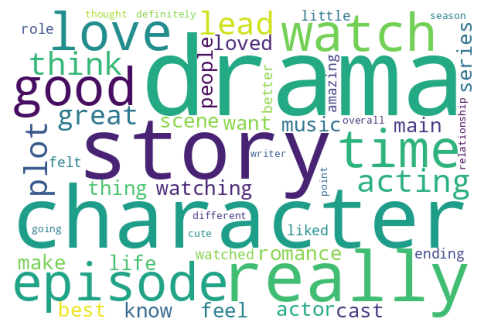

In [ ]:
# topic 0
draw_word_cloud(0)

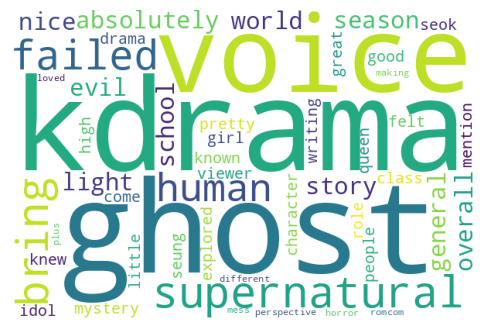

In [ ]:
# topic 1
draw_word_cloud(1)

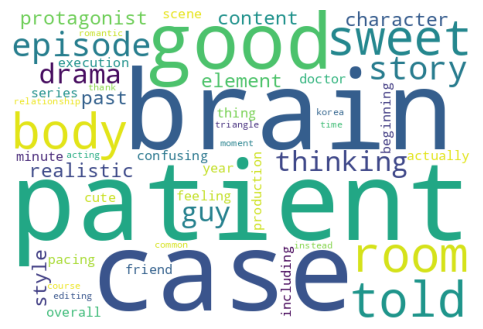

In [ ]:
# topic 2
draw_word_cloud(2)

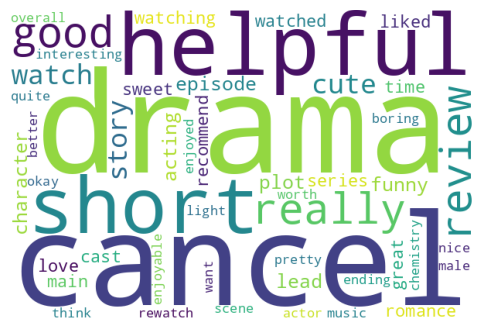

In [ ]:
# topic 3
draw_word_cloud(3)

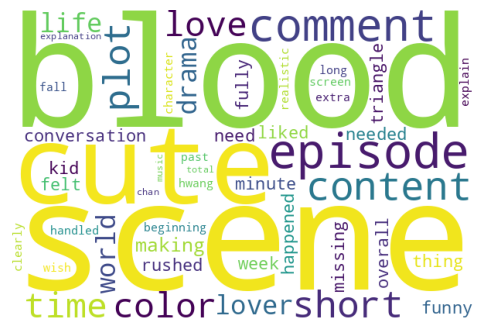

In [ ]:
# topic 4
draw_word_cloud(4)

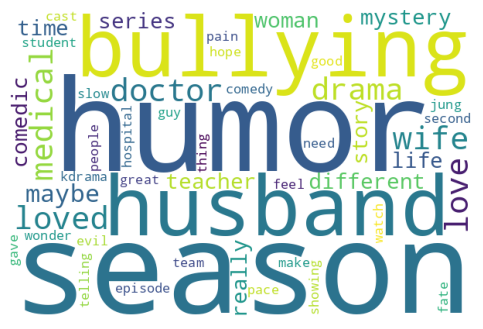

In [ ]:
# topic 5
draw_word_cloud(5)

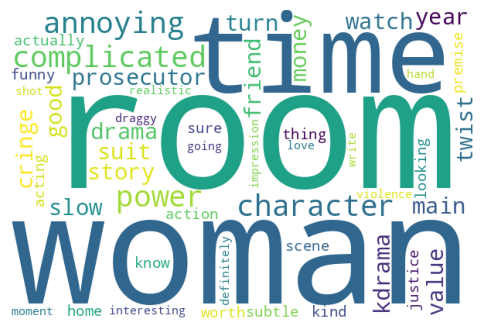

In [ ]:
# topic 6
draw_word_cloud(6)

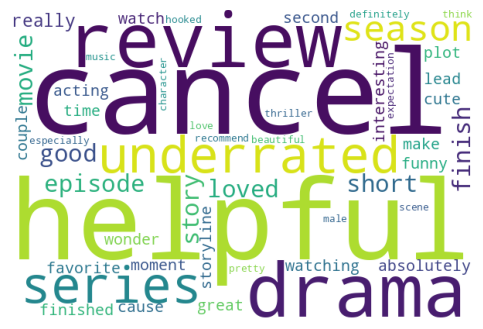

In [ ]:
# topic 7
draw_word_cloud(7)

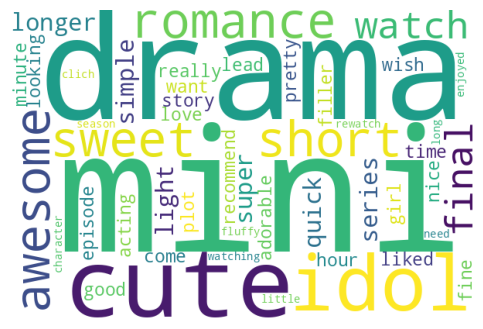

In [ ]:
# topic 8
draw_word_cloud(8)

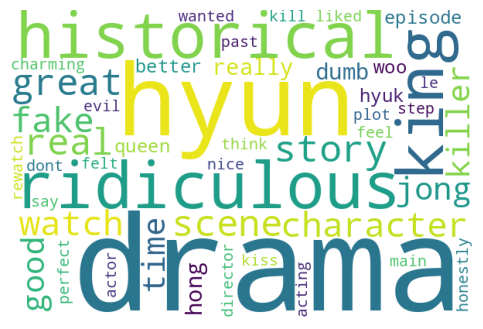

In [ ]:
# topic 9
draw_word_cloud(9)

Kata yang paling sering muncul untuk keseluruhan topik

In [ ]:
def print_top_words_across_all_topics(lda_model, vect, top_words=10):
    all_topic_keywords = []

    for comp in lda_model.components_:
        vocab_comp = zip(vocab, comp)
        sorted_words = [t[0] for t in sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:top_words]]
        all_topic_keywords.extend(sorted_words)

    word_frequency = {}
    for word in all_topic_keywords:
        word_frequency[word] = word_frequency.get(word, 0) + 1

    sorted_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

    print("Most frequent words across all topics:")
    print(" ".join([word for word, _ in sorted_frequency[:top_words]]))

# Call the functions
print_top_words_across_all_topics(lda_model, vect)

Most frequent words across all topics:
drama story episode good like watch time season short cute


Wordcloud untuk keseluruhan topik

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image for all topics
def draw_word_cloud_all_topics(lda_model, vocab):
    imp_words_all_topics = ""
    num_topics = lda_model.n_components

    for i in range(num_topics):
        comp = lda_model.components_[i]
        vocab_comp = zip(vocab, comp)
        sorted_words = sorted(vocab_comp, key=lambda x: x[1], reverse=True)[:50]

        imp_words_all_topics += " ".join(word[0] for word in sorted_words)

    wordcloud_all_topics = WordCloud(width=600, height=400, background_color='white').generate(imp_words_all_topics)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud_all_topics, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()
    plt.show()



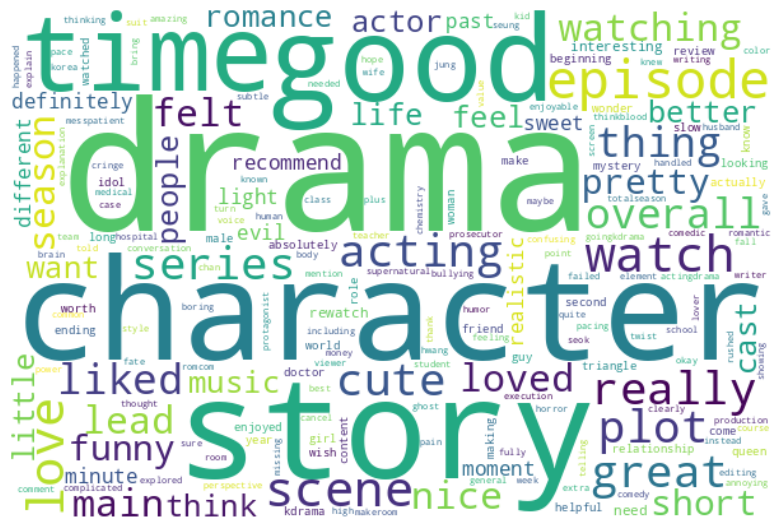

In [ ]:
# Call the function to draw word cloud for all topics
draw_word_cloud_all_topics(lda_model, vocab)

**Display the results**

Display dalam bentuk Dataframe

In [ ]:
# Tambahkan kolom untuk menyimpan hasil prediksi topik
df['topic'] = [lda_top[i].argmax() for i in range(len(lda_top))]

In [ ]:
# Untuk menampilkan seluruh isi kolom review_text
pd.set_option('display.max_colwidth', -1)

# Membuat DataFrame dengan kolom 'title', 'review_text', dan 'topic'
df_display = df[['title', 'review_cleaned_text', 'topic']]

# Menampilkan 10 baris pertama
print("10 Baris Pertama:")
print(df_display.head(10))

print('<-------------------------------------------------------------------->')

# Menampilkan 10 baris terakhir
print("\n10 Baris Terakhir:")
print(df_display.tail(20))

10 Baris Pertama:
                             title  \
0  Sing My Crush                     
1  Happy Merry Ending                
2  Duty After School: Part 2         
3  Our Dating Sim                    
4  The Director Who Buys Me Dinner   
5  Unlock My Boss                    
6  Roommates of Poongduck 304        
7  The Golden Spoon                  
8  Big Mouth                         
9  Blueming                          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<ipython-input-41-d2dfdad1f907>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
